In [14]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [15]:
(imdb_train_original, imdb_validate_original, imdb_test_original), info = \
tfds.load(
    name="imdb_reviews/subwords8k",
    split=["train[:80%]", "train[80%:]", "test"],
    with_info=True,
    as_supervised=True

)
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [16]:
type(imdb_train_original)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [17]:
reviews = np.array(
    list(imdb_train_original.map(lambda review, label: review))
)
    
print("Total", reviews.shape)
    
for index, review in enumerate(reviews[:16]):
    print("Index: {} Length: {}".format(index, review.shape[0]))

Total (20000,)
Index: 0 Length: 163
Index: 1 Length: 142
Index: 2 Length: 200
Index: 3 Length: 117
Index: 4 Length: 106
Index: 5 Length: 421
Index: 6 Length: 974
Index: 7 Length: 188
Index: 8 Length: 313
Index: 9 Length: 179
Index: 10 Length: 280
Index: 11 Length: 394
Index: 12 Length: 805
Index: 13 Length: 241
Index: 14 Length: 517
Index: 15 Length: 125


/Users/iskriyanavasileva/opt/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [18]:
type(reviews)

numpy.ndarray

min 11
mean 343.74655
std 264.46639732317124
max 3944


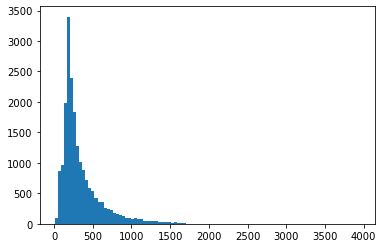

In [19]:
lengths = [len(x) for x in reviews]
print("min", np.min(lengths))
print("mean", np.mean(lengths))
print("std", np.std(lengths))
print("max", np.max(lengths))
plt.hist(lengths, bins=100)
plt.show()
plt.close()

In [20]:
reviews[0].numpy()

array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
       5790,  995, 7968,    8,   52, 2948, 5240, 80

In [21]:
encoder = info.features["text"].encoder
print("Vocabulary size: {}".format(encoder.vocab_size))

Vocabulary size: 8185


In [22]:
" ".join(encoder.subwords) # in IMDB - from most occuring to least occuring

'the_ ,  .  a_ and_ of_ to_ s_ is_ br in_ I_ that_ this_ it_  /><  /> was_ The_ as_ t_ with_ for_ .< on_ but_ movie_  ( are_ his_ have_ film_ not_ ing_ be_ ed_ you_  " it d_ an_ he_ by_ at_ one_ who_ y_ from_ e_ or_ all_ like_ they_ "  so_ just_ has_ )  her_ about_ out_ This_ some_ ly_ movie film very_ more_ It_ would_ what_ when_ which_ good_ if_ up_ only_ even_ their_ had_ really_ my_ can_ no_ were_ see_ she_ ?  than_ !  there_ get_ been_ into_  -  will_ much_ story_ because_ ing time_ n_ we_ ed me_ :  most_ other_ don do_ m_ es_ how_ also_ make_ its_ could_ first_ any_ \'  people_ great_ ve_ ly er_ made_ r_ But_ think_  \' i_ bad_ A_ And_ It on ;  him_ being_ never_ way_ that many_ then_ where_ two_ In_ after_ too_ little_ you ),  well_ ng_ your_ If_ l_ ).  does_ ever_ them_ did_ watch_ know_ seen_ time er character_ over_ characters_ movies_ man_ There_ love_ best_ still_ off_ such_ in should_ the re_ He_ plot_ films_ go_ these_ acting_ doesn es show_ through_ better_ al_ something

In [23]:
text = "Hello my dear Data Science Retreat students!"
print("Original:", text)

text_encoded = encoder.encode(text)
print("Encoded:", text_encoded)

text_decoded = encoder.decode(text_encoded)
print("Decoded:", text_decoded)

Original: Hello my dear Data Science Retreat students!
Encoded: [4025, 222, 82, 4946, 127, 878, 1848, 2675, 2975, 1333, 6517, 6883, 8044, 7962]
Decoded: Hello my dear Data Science Retreat students!


In [24]:
type(encoder)

tensorflow_datasets.core.features.text.subword_text_encoder.SubwordTextEncoder

In [25]:
text = "Hullo"
print("Original:", text)

text_encoded = encoder.encode(text)
print("Encoded:", text_encoded)
for i in text_encoded:
    print(encoder.subwords[i - 1])

text_decoded = encoder.decode(text_encoded)
print("Decoded:", text_decoded)

Original: Hullo
Encoded: [908, 2469]
Hu
llo
Decoded: Hullo


In [26]:
random_review, random_label = list(imdb_train_original.shuffle(1000).take(1))[0]
print(random_review.numpy())
print(random_label.numpy())
print(encoder.decode(random_review))

[  12 3625  143  121 1394 7976 1760   79  118   27   25 2939   99    1
   27   18 4638 7961   50 3118  522 8002 7968  111  953 1089    7    1
 1003 1602   24   10   16   10   17   12   18 5887 7961   23    1 2315
  254   38 2092 4035   54 1138   12  270    1  314   18  236   74 2605
  116  101 2271    5 7772    2   12  524   15   18  372  218   68   89
 3400    3   62  139  624 7985    2   12   80  520 5488   23   71   53
   70  110   22   14   66    3 3975 2245  618    2  916 5601    2 3585
  317    2 2028 2684  409  362 7974 1270 3429  449  432   31   51 6415
   55   97  342    1  101    6    1  118   66    2  206   38 2092 4035
  106   19 4798 7419 8030   54   80   41 3916    7 1118   15   51   94
    4  122 1083   24   10   16   10   17   19   27 2899   25  244   97
  242 3436    2   26   12  845 5150    1 1876    5  406   46   80  119
  179  356 1696   34    1 4543 7961    6 5791   34 3824 1901 8044  719
   19 4798 7419 8030   54   18    4 7181 7968    8 2440 1222 1360 3810
 4211 

In [27]:
dimensions = encoder.vocab_size

def encode(indices, labels):
    indices = tf.dtypes.cast(indices, tf.int32)
    review_encoded = tf.one_hot(indices=indices, depth=dimensions) # see picture in notes
    review_encoded = tf.reduce_max(review_encoded, 0)
    
    label_encoded = labels
    return review_encoded, label_encoded

imdb_train = imdb_train_original.map(lambda review, label: encode(review, label)).cache()
imdb_validate = imdb_validate_original.map(lambda review, label: encode(review, label)).cache()
imdb_test = imdb_test_original.map(lambda review, label: encode(review, label)).cache()

In [28]:
random_review, random_label = list(imdb_train.shuffle(1000).take(1))[0]
print(random_review.shape) # fixed the length
print(random_review.numpy())
print(np.sum(random_review))
print(random_label)

(8185,)
[0. 1. 1. ... 0. 0. 0.]
368.0
tf.Tensor(1, shape=(), dtype=int64)


In [29]:
from tensorflow.keras import models, layers, regularizers

In [30]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(dimensions,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary() # trainable parameters - they are related to the time it is going to train

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_l2 = models.Sequential()

model_l2.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(dimensions,)))
model_l2.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.Dense(1, activation="sigmoid"))
model_l2.summary() # trainable parameters - they are related to the time it is going to train

model_l2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_do = models.Sequential()

model_do.add(layers.Dense(16, activation="relu", input_shape=(dimensions,)))
model_do.add(layers.Dropout(0.75))
model_do.add(layers.Dense(16, activation="relu"))
model_do.add(layers.Dropout(0.75))
model_do.add(layers.Dense(1, activation="sigmoid"))
model_do.summary() # trainable parameters - they are related to the time it is going to train

model_do.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                130976    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                130976    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
____________________________

In [31]:
review_indices, _ = list(imdb_train_original.take(1).as_numpy_iterator())[0] # still deterministic, no reshuffling
review_indices

array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
       5790,  995, 7968,    8,   52, 2948, 5240, 80

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


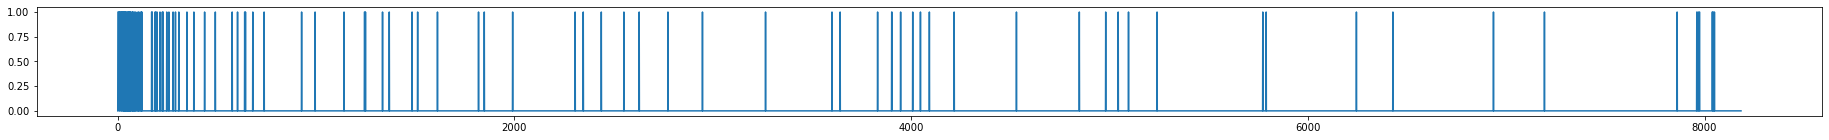

Expectation 0
Prediction [0.517348]


In [32]:
review_decoded = encoder.decode(review_indices)
print(review_decoded)

review_onehot, label = list(imdb_train.take(1).as_numpy_iterator())[0]
plt.figure(figsize=(32, 2))
plt.plot(review_onehot)
plt.show()
plt.close()
print("Expectation", label)

prediction = model.predict(np.array([review_onehot]))[0]
print("Prediction", prediction)

#### loss, accuracy = model.evaluate(imdb_test.batch(512))
loss, accuracy

In [36]:
np.array(list(imdb_test)).shape

KeyboardInterrupt: 

In [ ]:
loss_l2, accuracy_l2 = model_l2.evaluate(imdb_test.batch(512))
loss_l2, accuracy_l2

In [ ]:
loss_do, accuracy_do = model_do.evaluate(imdb_test.batch(512))
loss_do, accuracy_do

In [ ]:
history = model.fit(
    imdb_train.shuffle(10000).batch(512),
    epochs=20,
    validation_data=imdb_validate.batch(512) # I don't shuffle, because you do not change anything on the visualisation data
)

In [ ]:
history_l2 = model_l2.fit(
    imdb_train.shuffle(10000).batch(512),
    epochs=20,
    validation_data=imdb_validate.batch(512) # I don't shuffle, because you do not change anything on the visualisation data
)

In [ ]:
history_do = model_do.fit(
    imdb_train.shuffle(10000).batch(512),
    epochs=20,
    validation_data=imdb_validate.batch(512) # I don't shuffle, because you do not change anything on the visualisation data
)

In [ ]:
plt.plot(history.history["loss"], label=['loss'])
plt.plot(history.history["val_loss"], label=['val_loss'])
plt.legend()
plt.show()
plt.close()


plt.plot(history.history["accuracy"], label=['accuracy'])
plt.plot(history.history["val_accuracy"], label=['val_accuracy'])
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.plot(history_l2.history["loss"], label=['loss'])
plt.plot(history_l2.history["val_loss"], label=['val_loss'])
plt.legend()
plt.show()
plt.close()


plt.plot(history_l2.history["accuracy"], label=['accuracy'])
plt.plot(history_l2.history["val_accuracy"], label=['val_accuracy'])
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.plot(history_do.history["loss"], label=['loss'])
plt.plot(history_do.history["val_loss"], label=['val_loss'])
plt.legend()
plt.show()
plt.close()


plt.plot(history_do.history["accuracy"], label=['accuracy'])
plt.plot(history_do.history["val_accuracy"], label=['val_accuracy'])
plt.legend()
plt.show()
plt.close()

In [ ]:
#print(history.history.keys())
print(history.history['val_loss'])
#tf.unstack(
#    history_l2#, num=None, axis=0, name='unstack'
#)

In [ ]:
#test = list(model_l2.evaluate(imdb_test.batch(1)))
imdb_train

In [ ]:
list_e = []
for x, y in imdb_test.as_numpy_iterator():
    #print(i[1])
    list_e.append(model_l2.evaluate(x.reshape(1,-1), y.reshape(1,-1), verbose=0))   

In [ ]:
list_e.sort()
print("Min:", list_e[:11])
print()
print("Max:", list_e[-11:])

In [ ]:
plt.hist(list_e)